In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss, zivot_andrews, acf
from scipy.stats import boxcox
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 97 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    733 non-null    object 
 1   20229   719 non-null    float64
 2   22314   730 non-null    float64
 3   22632   732 non-null    float64
 4   24028   506 non-null    float64
 5   24052   687 non-null    float64
 6   24309   661 non-null    float64
 7   24619   732 non-null    float64
 8   25021   307 non-null    float64
 9   26191   459 non-null    float64
 10  27213   428 non-null    float64
 11  28802   720 non-null    float64
 12  29146   717 non-null    float64
 13  30731   595 non-null    float64
 14  30862   552 non-null    float64
 15  30904   544 non-null    float64
 16  32407   715 non-null    float64
 17  33421   733 non-null    float64
 18  33495   652 non-null    float64
 19  34200   675 non-null    float64
 20  34399   688 non-null    float64
 21  34673   728 non-null    float64
 22  35

In [4]:
data

,Time,20229,22314,22632,24028,24052,24309,24619,25021,26191,...,75539,75548,76204,76589,80136,80381,81231,81651,82783,82811
0,2023-04-27 15:00:00,5.54,8.53,8.48,6.47,0.86,9.38,8.75,NaN,17.60,...,5.46,5.55,6.89,35.80,9.75,8.14,NaN,NaN,NaN,NaN
1,2023-04-28 03:00:00,6.01,8.89,9.42,3.02,2.19,8.51,9.35,NaN,12.40,...,5.96,7.53,6.18,19.40,11.20,9.41,NaN,NaN,NaN,NaN
2,2023-04-28 15:00:00,2.44,3.57,3.99,2.23,2.54,3.97,3.26,NaN,13.30,...,2.53,1.90,2.82,11.00,3.09,3.42,NaN,NaN,NaN,NaN
3,2023-04-29 03:00:00,1.34,2.08,2.14,1.07,1.33,1.07,2.51,NaN,4.83,...,2.80,1.69,1.11,4.39,1.87,2.24,NaN,NaN,NaN,NaN
4,2023-04-29 15:00:00,3.48,3.69,4.70,5.99,0.63,6.13,6.24,NaN,17.40,...,3.94,4.66,4.70,15.30,9.56,4.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2024-04-25 15:00:00,4.53,6.08,6.77,8.31,1.35,7.39,7.39,13.00,12.50,...,4.19,3.70,6.07,42.60,9.50,6.83,10.80,8.01,5.91,8.07
729,2024-04-26 03:00:00,5.97,8.36,9.51,5.90,1.89,8.06,10.10,11.20,14.40,...,5.27,5.08,7.67,14.10,9.21,8.80,12.80,8.06,7.20,7.88
730,2024-04-26 15:00:00,6.18,8.83,7.80,10.10,4.02,12.80,7.69,20.00,20.70,...,6.30,3.17,10.50,15.40,9.20,7.25,16.10,14.80,10.20,13.10
731,2024-04-27 03:00:00,4.89,7.09,7.77,6.59,2.97,8.73,8.41,15.80,9.09,...,5.81,3.51,6.87,15.30,7.99,7.18,12.00,10.30,8.39,8.86


In [5]:
data = data.fillna(data.mean())

C:\Users\Huawei\AppData\Local\Temp\ipykernel_16392\476127175.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


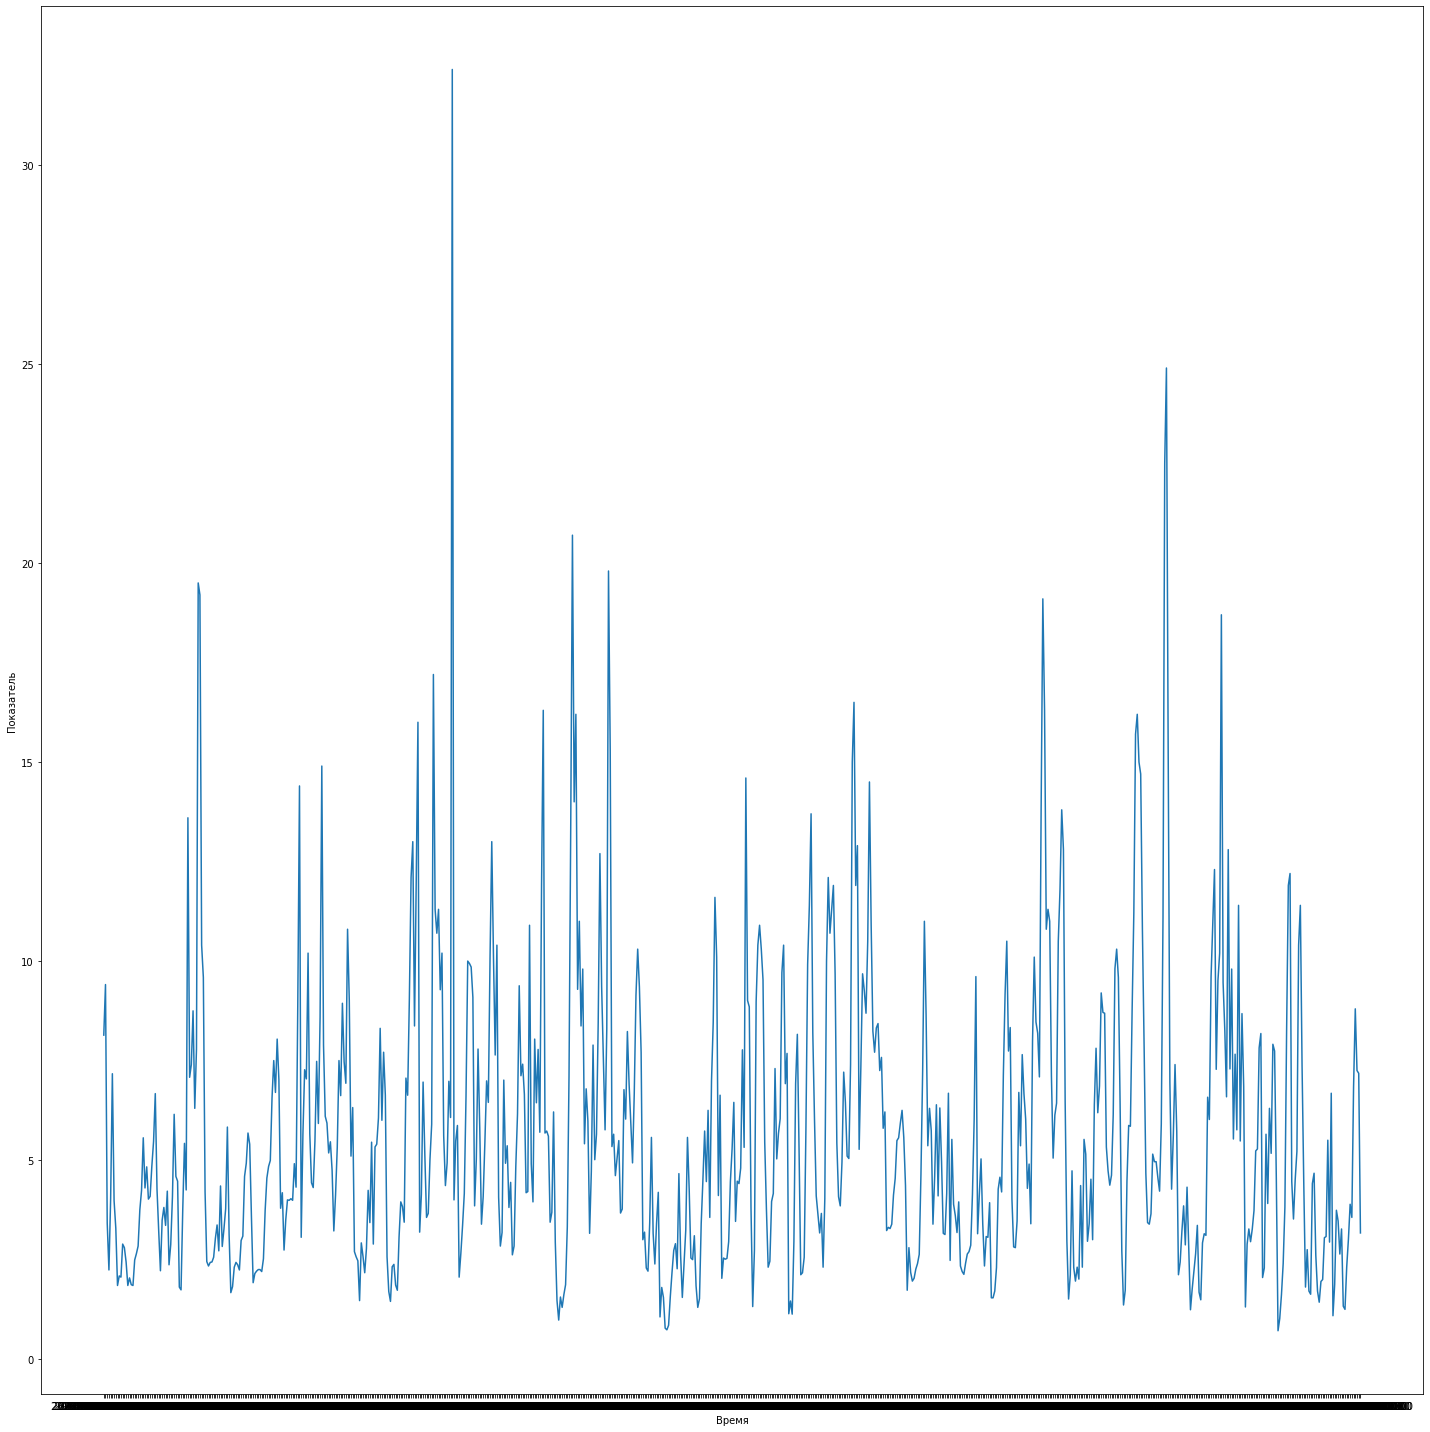

In [6]:
plt.figure(figsize=(20, 20))
plt.plot(data['Time'], data['80381'])
plt.xlabel('Время')
plt.ylabel('Показатель')
plt.tight_layout()
plt.show()

In [14]:
result = adfuller(data["80381"])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = kpss(data["80381"])
    
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))
    
za_results = zivot_andrews(data["80381"])

print('Zivot-Andrews Statistic:', za_results[0])
print('p-value:', za_results[1])
print('Breakpoint:', za_results[2])

ADF Statistic: -12.196226179854866
p-value: 1.2527748471088802e-22
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
KPSS Statistic: 0.14024819388482584
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Zivot-Andrews Statistic: -12.423490912921087
p-value: 1e-05
Breakpoint: {'1%': -5.27644, '5%': -4.81067, '10%': -4.56618}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


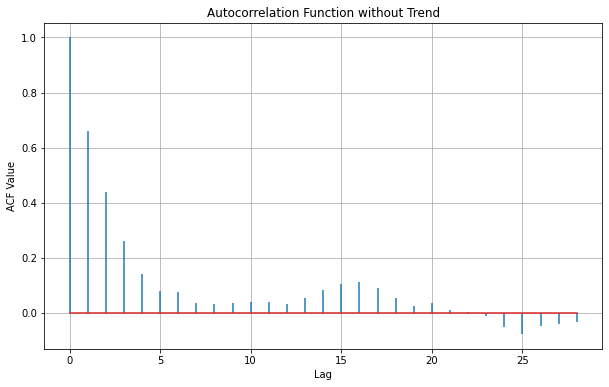

In [10]:
#автокор
acf_values = acf(data["80381"], fft=False)

#лаги
num_lags = len(acf_values) - 1


plt.figure(figsize=(10, 6))
plt.stem(np.arange(num_lags+1), acf_values, markerfmt=' ')
plt.title('Autocorrelation Function without Trend')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.grid(True)
plt.show()

Оптимальное значение lambda: 0.06155544120541813


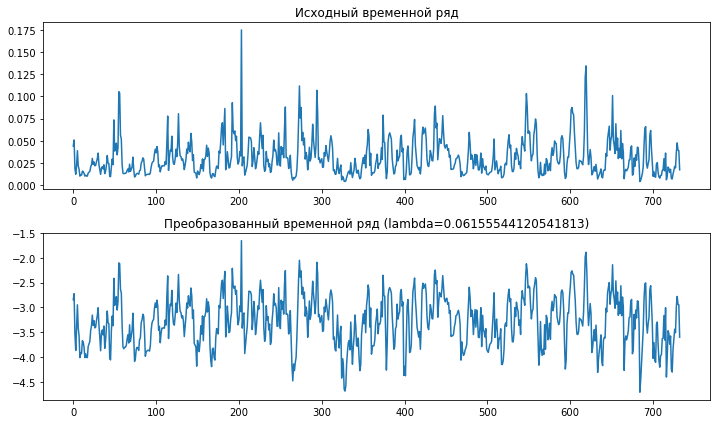

In [11]:
# Бокс-Кокс
transformed_series, lambda_value = boxcox(data["80381"])

print("Оптимальное значение lambda:", lambda_value)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data["80381"])
plt.title("Исходный временной ряд")
plt.subplot(2, 1, 2)
plt.plot(transformed_series)
plt.title("Преобразованный временной ряд (lambda={})".format(lambda_value))
plt.tight_layout()
plt.show()

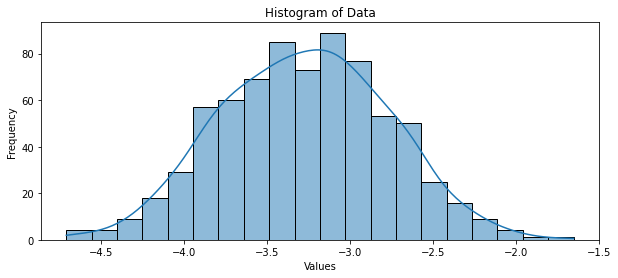

In [13]:
plt.figure(figsize=(10, 4))
sns.histplot(transformed_series, kde=True)
plt.title('Histogram of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [16]:
t_data = data.T

In [27]:
df = t_data.iloc[1:]
df = df.T

In [28]:
df

,20229,22314,22632,24028,24052,24309,24619,25021,26191,27213,...,75539,75548,76204,76589,80136,80381,81231,81651,82783,82811
0,5.54,8.53,8.48,6.47,0.86,9.38,8.75,8.94759,17.6,10.2,...,5.46,5.55,6.89,35.8,9.75,0.043982,10.869043,5.748793,5.517872,5.693876
1,6.01,8.89,9.42,3.02,2.19,8.51,9.35,8.94759,12.4,10.5,...,5.96,7.53,6.18,19.4,11.2,0.050844,10.869043,5.748793,5.517872,5.693876
2,2.44,3.57,3.99,2.23,2.54,3.97,3.26,8.94759,13.3,3.71,...,2.53,1.9,2.82,11.0,3.09,0.018479,10.869043,5.748793,5.517872,5.693876
3,1.34,2.08,2.14,1.07,1.33,1.07,2.51,8.94759,4.83,2.65,...,2.8,1.69,1.11,4.39,1.87,0.012103,10.869043,5.748793,5.517872,5.693876
4,3.48,3.69,4.7,5.99,0.63,6.13,6.24,8.94759,17.4,5.95,...,3.94,4.66,4.7,15.3,9.56,0.021829,10.869043,5.748793,5.517872,5.693876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,4.53,6.08,6.77,8.31,1.35,7.39,7.39,13.0,12.5,7.39,...,4.19,3.7,6.07,42.6,9.5,0.036904,10.8,8.01,5.91,8.07
729,5.97,8.36,9.51,5.9,1.89,8.06,10.1,11.2,14.4,11.3,...,5.27,5.08,7.67,14.1,9.21,0.047548,12.8,8.06,7.2,7.88
730,6.18,8.83,7.8,10.1,4.02,12.8,7.69,20.0,20.7,9.38,...,6.3,3.17,10.5,15.4,9.2,0.039173,16.1,14.8,10.2,13.1
731,4.89,7.09,7.77,6.59,2.97,8.73,8.41,15.8,9.09,9.23,...,5.81,3.51,6.87,15.3,7.99,0.038795,12.0,10.3,8.39,8.86
